In [87]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

In [88]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [89]:
fmnist_train = torchvision.datasets.FashionMNIST('../../Downloads/FashionMNIST',train=True,download=True,transform=transforms.ToTensor())

In [90]:
fmnist_val = torchvision.datasets.FashionMNIST('../../Downloads/FashionMNIST',train=False,download=True,transform=transforms.ToTensor())

In [91]:
class_names = ['T-Shirt', 'Trousers', 'Pullover', 'dress', 'coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

(<matplotlib.image.AxesImage at 0x2ccf39ced60>, 'Pullover')

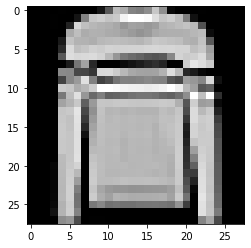

In [92]:
img,label = fmnist_train[5]
plt.imshow(img.squeeze(0), cmap='gray'),class_names[label]

In [93]:
fmnist_train_stack = torch.stack([img for img,_ in fmnist_train],dim=0)

In [94]:
fmnist_train_stack.shape

torch.Size([60000, 1, 28, 28])

In [95]:
fmnist_train_stack = fmnist_train_stack.view(1,-1)

In [96]:
torch.mean(fmnist_train_stack, dim=1)

tensor([0.2860])

In [97]:
torch.std(fmnist_train_stack, dim=1)

tensor([0.3530])

In [98]:
ftn = torchvision.datasets.FashionMNIST('../../Downloads/FashionMNIST',train=True,download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.2860),(0.3530))]))

In [102]:
fvn = torchvision.datasets.FashionMNIST('../../Downloads/FashionMNIST',train=False,download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.2860),(0.3530))])) 

In [106]:
train_loader = torch.utils.data.DataLoader(ftn, batch_size=100, shuffle=True)

In [169]:
val_loader = torch.utils.data.DataLoader(fvn, batch_size=100, shuffle=False)

In [158]:
for img,label in train_loader:
    print(img.shape)
    break

torch.Size([100, 1, 28, 28]) 100


In [109]:
import torch.nn.functional as F

In [113]:
import datetime

In [146]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [147]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 14, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(14, 7, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(343,170)
        self.fc2 = nn.Linear(170,85)
        self.fc3 = nn.Linear(85,10)
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1, 7*7*7)
        out = torch.tanh(self.fc1(out))
        out = torch.tanh(self.fc2(out))
        out = self.fc3(out)
        return out    

In [148]:
def training(n_epochs, model, optimizer, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        total_loss = 0.0
        for imgs,labels in train_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            output = model(imgs)
            loss = loss_fn(output, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss+=loss.item()
        if epoch==1 or epoch%10==0:
            print(f'Time: {datetime.datetime.now()} Epoch: {epoch} Loss: {total_loss/len(train_loader)} ')

In [149]:
n_epochs = 100
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [150]:
training(n_epochs, model, optimizer, loss_fn, train_loader)

Time: 2021-10-15 19:59:39.273711 Epoch: 1 Loss: 1.5271765133738517 
Time: 2021-10-15 20:00:57.293903 Epoch: 10 Loss: 0.3968479662388563 
Time: 2021-10-15 20:02:32.926910 Epoch: 20 Loss: 0.31063135735690595 
Time: 2021-10-15 20:04:09.690349 Epoch: 30 Loss: 0.2737657347818216 
Time: 2021-10-15 20:05:46.774891 Epoch: 40 Loss: 0.2509576994801561 
Time: 2021-10-15 20:07:23.404228 Epoch: 50 Loss: 0.23391637777288754 
Time: 2021-10-15 20:08:59.540827 Epoch: 60 Loss: 0.21989991313467422 
Time: 2021-10-15 20:10:35.843265 Epoch: 70 Loss: 0.20783168649921815 
Time: 2021-10-15 20:31:14.789937 Epoch: 80 Loss: 0.19839745217934251 
Time: 2021-10-15 20:34:00.319791 Epoch: 90 Loss: 0.18800501809765896 
Time: 2021-10-15 20:36:47.062335 Epoch: 100 Loss: 0.17931010993818441 


In [170]:
def validate(model, train_loader, val_loader):
    for name,loader in [('training',train_loader),('validation', val_loader)]:
        correct=0
        total=0
        with torch.no_grad():
            for imgs,labels in loader:
                imgs = imgs.to(device)
                labels = labels.to(device)
                output = model(imgs)
                _,predicted = output.max(1)
                correct += int((predicted==labels).sum())
                total += len(labels)
            print(f'{name}: {correct/total}')        

In [171]:
validate(model, train_loader, val_loader)

training: 0.9363666666666667
validation: 0.9121


In [178]:
torch.save(model.state_dict(), './FashionMNIST')

In [179]:
loaded_model = Net().to(device='cpu')
loaded_model.load_state_dict(torch.load('./FashionMNIST', map_location='cpu'))

<All keys matched successfully>

(<matplotlib.image.AxesImage at 0x2cce2f84a00>, 'Pullover')

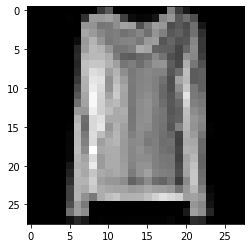

In [253]:
img,label = fvn[103]
plt.imshow(img.squeeze(0), cmap='gray'),class_names[label]

In [254]:
with torch.no_grad():
    index = loaded_model(img.unsqueeze(0))
    index = F.softmax(index, dim=1)[0]
    index = [(value.item()*100,class_names[i]) for i,value in enumerate(index)]
index = sorted(index, key=lambda x:x[0], reverse=True)
index

[(53.073716163635254, 'Shirt'),
 (23.428523540496826, 'T-Shirt'),
 (23.17919284105301, 'Pullover'),
 (0.2783405361697078, 'dress'),
 (0.023367381072603166, 'Bag'),
 (0.01283892197534442, 'coat'),
 (0.003381316491868347, 'Trousers'),
 (0.00044736702875525225, 'Sandal'),
 (0.0001081858272300451, 'Ankle Boot'),
 (7.322732358261419e-05, 'Sneaker')]

In [244]:
with torch.no_grad():
    for index,(imgs,labels) in enumerate(fvn):
        output = loaded_model(imgs.unsqueeze(0))
        _,output = output.max(dim=1)
        if output!=labels:
            print(index)
        

23
25
42
49
68
89
98
103
107
135
147
150
153
160
172
192
227
239
241
244
271
279
282
311
316
324
325
361
378
381
382
389
392
396
404
406
407
441
452
454
459
460
474
476
490
510
529
541
548
558
563
573
585
594
607
628
635
639
659
663
669
670
688
701
711
716
722
732
753
760
787
801
805
837
851
881
893
905
909
921
935
937
939
960
963
965
966
971
977
979
1000
1005
1025
1055
1056
1058
1064
1066
1101
1104
1107
1111
1129
1131
1139
1152
1160
1162
1165
1210
1218
1231
1254
1297
1300
1305
1326
1329
1334
1336
1353
1374
1408
1425
1455
1462
1482
1501
1509
1522
1533
1557
1559
1562
1572
1596
1611
1620
1629
1632
1642
1643
1645
1650
1665
1686
1706
1710
1712
1736
1740
1743
1744
1771
1846
1852
1856
1863
1867
1878
1921
1922
1930
1942
1943
1953
1964
1968
1980
2001
2006
2021
2022
2037
2039
2042
2062
2067
2071
2073
2106
2110
2144
2162
2191
2195
2252
2278
2279
2281
2290
2311
2312
2315
2316
2318
2320
2326
2337
2376
2396
2397
2417
2425
2431
2457
2462
2464
2469
2476
2478
2485
2491
2500
2506
2507
2508
2509
2529
25